In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

Wine quality dataset http://archive.ics.uci.edu/ml/datasets/Wine+Quality, https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

Description:

The dataset is related to red variants of the Portuguese "Vinho Verde" wine. 

The dataset can be viewed as a classification or regression task. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. 

Attribute Information:

Input variables (based on physicochemical tests): 
1 - fixed acidity 
2 - volatile acidity 
3 - citric acid 
4 - residual sugar 
5 - chlorides 
6 - free sulfur dioxide 
7 - total sulfur dioxide 
8 - density 
9 - pH 
10 - sulphates 
11 - alcohol 

Output variable (based on sensory data): 
12 - quality (score between 0 and 10)

In [3]:
df_red = pd.read_csv('data/winequality-red.csv', sep=';')

In [4]:
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


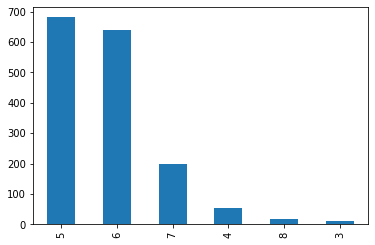

In [6]:
df_red.quality.value_counts().plot.bar();

In [7]:
df_red.quality.value_counts().sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

In [8]:
X = df_red.values[:, :11]
y = df_red.values[:, 11]
Rand = 1

### Regression task

#### Splitting data into train and test

In [9]:
from sklearn.model_selection import train_test_split
# train_test_split splits in  proportions 0.75 and 0.25 by default
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=Rand) 
print(Xtrain.shape, Xtest.shape)

(1199, 11) (400, 11)


(array([  9.,  37., 510., 471., 157.,  15.]),
 array([3, 4, 5, 6, 7, 8, 9]),
 <a list of 6 Patch objects>)

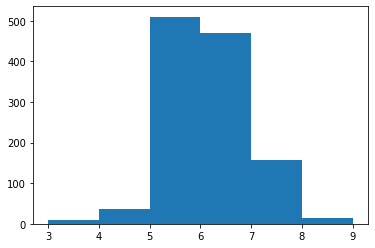

In [10]:
plt.hist(ytrain, bins=[3, 4, 5, 6, 7, 8, 9])

(array([  1.,  16., 171., 167.,  42.,   3.]),
 array([3, 4, 5, 6, 7, 8, 9]),
 <a list of 6 Patch objects>)

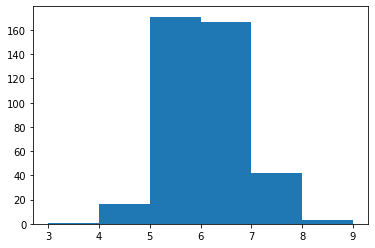

In [11]:
plt.hist(ytest, bins=[3, 4, 5, 6, 7, 8, 9])

#### LinearRegression with default hyperparameters

In [12]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [13]:
lr.fit(Xtrain, ytrain)

LinearRegression()

In [14]:
print('train R^2', lr.score(Xtrain, ytrain))
print('test R^2', lr.score(Xtest, ytest))

train R^2 0.36362570974765596
test R^2 0.34363701984370953


#### LinearRegression with PolynomialFeatures (n=2)

In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

lrp2 = make_pipeline(PolynomialFeatures(2),
                           LinearRegression())
lrp2.fit(Xtrain, ytrain)
print('train R^2', lrp2.score(Xtrain, ytrain))
print('test R^2', lrp2.score(Xtest, ytest))

train R^2 0.45016550731790805
test R^2 0.31272944662610647


#### Ridge with PolynomialFeatures (n=2)

In [16]:
from sklearn.linear_model import Ridge
poly = make_pipeline(PolynomialFeatures(2),
                           Ridge(alpha=1000))
poly.fit(Xtrain, ytrain)
print('train R^2', poly.score(Xtrain, ytrain))
print('test R^2', poly.score(Xtest, ytest))

train R^2 0.396419603851071
test R^2 0.36510293408437333


#### Lasso with PolynomialFeatures (n=2)

In [17]:
from sklearn.linear_model import Lasso
poly = make_pipeline(PolynomialFeatures(2),
                           Lasso(alpha=0.01))
poly.fit(Xtrain, ytrain)
print('train R^2', poly.score(Xtrain, ytrain))
print('test R^2', poly.score(Xtest, ytest))

train R^2 0.40716893014716926
test R^2 0.36753867224910486


#### RandomForestRegressor

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [20]:
rfr = RandomForestRegressor(random_state=Rand, n_jobs = -1)
rfr.fit(Xtrain, ytrain)
print('train R^2', rfr.score(Xtrain, ytrain))
print('test R^2', rfr.score(Xtest, ytest))

train R^2 0.9279671783235451
test R^2 0.45686149666793996


In [ ]:
# The best model for the regression task is obtained with RF algorithm

### Classification task

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score, classification_report, f1_score
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [11]:
def print_cm(cm, labels, hide_zeroes=False, hide_diagonal=False, hide_threshold=None):
    """pretty print for confusion matrixes"""
    columnwidth = max([len(x) for x in labels] + [5])  # 5 is value length
    empty_cell = " " * columnwidth
    
    # Begin CHANGES
    fst_empty_cell = (columnwidth-3)//2 * " " + "t/p" + (columnwidth-3)//2 * " "
    
    if len(fst_empty_cell) < len(empty_cell):
        fst_empty_cell = " " * (len(empty_cell) - len(fst_empty_cell)) + fst_empty_cell
    # Print header
    print("    " + fst_empty_cell, end=" ")
    # End CHANGES
    
    for label in labels:
        print("%{0}s".format(columnwidth) % label, end=" ")
        
    print()
    # Print rows
    for i, label1 in enumerate(labels):
        print("    %{0}s".format(columnwidth) % label1, end=" ")
        for j in range(len(labels)):
            cell = "%{0}.1f".format(columnwidth) % cm[i, j]
            if hide_zeroes:
                cell = cell if float(cm[i, j]) != 0 else empty_cell
            if hide_diagonal:
                cell = cell if i != j else empty_cell
            if hide_threshold:
                cell = cell if cm[i, j] > hide_threshold else empty_cell
            print(cell, end=" ")
        print()

#### 6 class classification, metric f1 macro

In [12]:
y = df_red.values[:, 11]
np.unique(y, return_counts=True)

(array([3., 4., 5., 6., 7., 8.]),
 array([ 10,  53, 681, 638, 199,  18], dtype=int64))

In [13]:
# Split the data with stratification
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, stratify=y, random_state=Rand)

In [14]:
np.unique(ytrain, return_counts=True)

(array([3., 4., 5., 6., 7., 8.]),
 array([  8,  40, 511, 478, 149,  13], dtype=int64))

In [15]:
np.unique(ytest, return_counts=True)

(array([3., 4., 5., 6., 7., 8.]),
 array([  2,  13, 170, 160,  50,   5], dtype=int64))

In [16]:
rfc = RandomForestClassifier(random_state=Rand, n_jobs = -1)
rfc.fit(Xtrain, ytrain)

ytrain_pred = rfc.predict(Xtrain)
print("Train f1_macro : %0.2f" % f1_score(ytrain, ytrain_pred, average = 'macro'))

scores_cv10 = cross_val_score(rfc, Xtrain, ytrain, scoring = 'f1_macro', cv = StratifiedKFold(n_splits=10, random_state=Rand, shuffle=True))
print("Mean cv f1_macro : %0.2f" % scores_cv10.mean())

Train f1_macro : 1.00
Mean cv f1_macro : 0.36


In [17]:
rfc = RandomForestClassifier(random_state=Rand, max_depth = 10, min_samples_split=3, min_samples_leaf=2, n_jobs = -1) # class_weight = 'balanced_subsample'
rfc.fit(Xtrain, ytrain)

ytrain_pred = rfc.predict(Xtrain)
print("Train f1_macro : %0.2f" % f1_score(ytrain, ytrain_pred, average = 'macro'))

scores_cv10 = cross_val_score(rfc, Xtrain, ytrain, scoring = 'f1_macro', cv = StratifiedKFold(n_splits=10, random_state=Rand, shuffle=True))
print("Mean cv f1_macro : %0.2f" % scores_cv10.mean())

Train f1_macro : 0.66
Mean cv f1_macro : 0.34


In [18]:
# Manual manipulations on RF simplification didn't give a better performance on cv (one can try GridSearchCV)
# Let's check performance of RF with default hyperparameters on test

In [19]:
rfc = RandomForestClassifier(random_state=Rand, n_jobs = -1)
rfc.fit(Xtrain, ytrain)
ytest_pred = rfc.predict(Xtest)
print(classification_report(ytest, ytest_pred))
cm = confusion_matrix(ytest, ytest_pred)
print_cm(cm, labels = ['3','4','5','6','7','8'])

              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         2
         4.0       0.00      0.00      0.00        13
         5.0       0.74      0.82      0.78       170
         6.0       0.64      0.71      0.67       160
         7.0       0.68      0.46      0.55        50
         8.0       0.00      0.00      0.00         5

    accuracy                           0.69       400
   macro avg       0.34      0.33      0.33       400
weighted avg       0.66      0.69      0.67       400

     t/p      3     4     5     6     7     8 
        3   0.0   0.0   2.0   0.0   0.0   0.0 
        4   0.0   0.0   8.0   5.0   0.0   0.0 
        5   0.0   0.0 139.0  30.0   1.0   0.0 
        6   0.0   1.0  37.0 114.0   8.0   0.0 
        7   0.0   0.0   1.0  26.0  23.0   0.0 
        8   0.0   0.0   0.0   3.0   2.0   0.0 


In [20]:
# Our RF model prediction is poor for classes 3, 4 and 8 (f1 macro on test 0.33)
# let's try 3 classes: 3+4+5, 6, 7+8

#### 3 class classification: 3+4+5, 6, 7+8; metric f1 macro 

In [21]:
# change y: 3,4->5, 8->7
y = df_red.values[:, 11]
y[y<=4] = 5
y[y==8] = 7

In [22]:
# Split the data with stratification
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, stratify=y, random_state=Rand)

In [23]:
rfc = RandomForestClassifier(random_state=Rand, n_jobs = -1)
rfc.fit(Xtrain, ytrain)

ytrain_pred = rfc.predict(Xtrain)
print("Train f1_macro : %0.2f" % f1_score(ytrain, ytrain_pred, average = 'macro'))

scores_cv10 = cross_val_score(rfc, Xtrain, ytrain, scoring = 'f1_macro', cv = StratifiedKFold(n_splits=10, random_state=Rand, shuffle=True))
print("Mean cv f1_macro : %0.2f" % scores_cv10.mean())

Train f1_macro : 1.00
Mean cv f1_macro : 0.67


In [24]:
# Check improve performance on cv changing hyperparameters values by hand (one can try GridSearchCV)

In [25]:
rfc = RandomForestClassifier(random_state=Rand, class_weight = 'balanced_subsample', n_jobs = -1)
rfc.fit(Xtrain, ytrain)

ytrain_pred = rfc.predict(Xtrain)
print("Train f1_macro : %0.2f" % f1_score(ytrain, ytrain_pred, average = 'macro'))

scores_cv10 = cross_val_score(rfc, Xtrain, ytrain, scoring = 'f1_macro', cv = StratifiedKFold(n_splits=10, random_state=Rand, shuffle=True))
print("Mean cv f1_macro : %0.2f" % scores_cv10.mean())

Train f1_macro : 1.00
Mean cv f1_macro : 0.68


In [26]:
# Let's check performance of RF with class_weight = 'balanced_subsample' on test

In [27]:
rfc = RandomForestClassifier(random_state=Rand, class_weight = 'balanced_subsample', n_jobs = -1)
rfc.fit(Xtrain, ytrain)
ytest_pred = rfc.predict(Xtest)
print(classification_report(ytest, ytest_pred))
cm = confusion_matrix(ytest, ytest_pred)
print_cm(cm, labels = ['5','6','7'])

              precision    recall  f1-score   support

         5.0       0.78      0.77      0.78       186
         6.0       0.62      0.68      0.65       160
         7.0       0.71      0.54      0.61        54

    accuracy                           0.70       400
   macro avg       0.70      0.66      0.68       400
weighted avg       0.71      0.70      0.70       400

     t/p      5     6     7 
        5 144.0  41.0   1.0 
        6  41.0 108.0  11.0 
        7   0.0  25.0  29.0 


In [38]:
# For 3 class classification task the performance on test is 2 times better
# than for 6 class classification problem